## Stopword Analysis

### We used 3 TC (Test Case) on this Project:
1. Zipf Law
2. Mutual Information
3. NLTK Stopword

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

#For download Stopwords
# import nltk
# nltk.download('stopwords')

from collections import Counter
#--------------------------------------#
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

## Read the Dataset

In [2]:
df = pd.read_csv('dataset/web-text-corpus/webtext.csv')

In [3]:
df

,text,domain
0,"Cookie Manager: ""Don't allow sites that set re...",firefox
1,When in full screen mode,firefox
2,Pressing Ctrl-N should open a new browser when...,firefox
3,add icons to context menu,firefox
4,"So called ""tab bar"" should be made a proper to...",firefox
5,[XUL] Implement Cocoa-style toolbar customizat...,firefox
6,#ifdefs for MOZ_PHOENIX,firefox
7,customize dialog's toolbar has small icons whe...,firefox
8,nightly builds and tinderboxen for Phoenix,firefox
9,finish tearing prefs UI to pieces and then mak...,firefox


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29070 entries, 0 to 29069
Data columns (total 2 columns):
text      25827 non-null object
domain    29070 non-null object
dtypes: object(2)
memory usage: 454.3+ KB


### Drop Missing Value on Rows

In [5]:
no_null_df = df.dropna()

In [6]:
no_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25827 entries, 0 to 29069
Data columns (total 2 columns):
text      25827 non-null object
domain    25827 non-null object
dtypes: object(2)
memory usage: 605.3+ KB


In [7]:
cnt = Counter()
dictionary_domain = {}
for domain in no_null_df['domain']:
    cnt[domain] += 1

In [8]:
cnt

Counter({'firefox': 10000,
         'grail': 1191,
         'overheard': 11715,
         'pirates': 1531,
         'singles': 160,
         'wine': 1230})

### We take 30 samples/sentences which including 15 data on Firefox class, 15 data on Overheard class

In [9]:
df_sample_firefox = no_null_df[no_null_df['domain'] == 'firefox'].iloc[:15,:]
df_sample_overheard = no_null_df[no_null_df['domain'] == 'overheard'].iloc[:15,:]
df_sample = pd.concat([df_sample_firefox, df_sample_overheard])

In [10]:
df_sample

,text,domain
0,"Cookie Manager: ""Don't allow sites that set re...",firefox
1,When in full screen mode,firefox
2,Pressing Ctrl-N should open a new browser when...,firefox
3,add icons to context menu,firefox
4,"So called ""tab bar"" should be made a proper to...",firefox
5,[XUL] Implement Cocoa-style toolbar customizat...,firefox
6,#ifdefs for MOZ_PHOENIX,firefox
7,customize dialog's toolbar has small icons whe...,firefox
8,nightly builds and tinderboxen for Phoenix,firefox
9,finish tearing prefs UI to pieces and then mak...,firefox


In [11]:
df_sample.reset_index(drop=True)

,text,domain
0,"Cookie Manager: ""Don't allow sites that set re...",firefox
1,When in full screen mode,firefox
2,Pressing Ctrl-N should open a new browser when...,firefox
3,add icons to context menu,firefox
4,"So called ""tab bar"" should be made a proper to...",firefox
5,[XUL] Implement Cocoa-style toolbar customizat...,firefox
6,#ifdefs for MOZ_PHOENIX,firefox
7,customize dialog's toolbar has small icons whe...,firefox
8,nightly builds and tinderboxen for Phoenix,firefox
9,finish tearing prefs UI to pieces and then mak...,firefox


## Preprocessing

### Case Folding

In [12]:
prepro_df = df_sample.copy()

In [13]:
prepro_df['text'] = prepro_df['text'].str.lower()

### Remove Punctuations, HTML, URL

In [14]:
def cleansing(document):
    #Define the Regex
    regex_html = '</?.*/?>'
    regex_url = '(https?://)|(https?:\/\/)?(www\.)?([-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*))'
    regex_punc = '[!\(\)-\[\]{};:"\'\,<>\./\?@#$%^&*_~]'
    regex_space = '\s{2,}'
    
    #Replace if match with Regex pattern
    document['text'] = document['text'].str.replace(regex_html, ' ')
    document['text'] = document['text'].str.replace(regex_url, ' ')
    document['text'] = document['text'].str.replace(regex_punc, '')
    document['text'] = document['text'].str.replace(regex_space, ' ')
    
    #Reset index
    document = document.reset_index(drop=True)
    
    return document

In [15]:
cleansing_df = cleansing(prepro_df)

In [16]:
cleansing_df

,text,domain
0,cookie manager dont allow sites that set remov...,firefox
1,when in full screen mode,firefox
2,pressing ctrln should open a new browser when ...,firefox
3,add icons to context menu,firefox
4,so called tab bar should be made a proper tool...,firefox
5,xul implement cocoastyle toolbar customization,firefox
6,ifdefs for mozphoenix,firefox
7,customize dialogs toolbar has small icons when...,firefox
8,nightly builds and tinderboxen for phoenix,firefox
9,finish tearing prefs ui to pieces and then mak...,firefox


In [17]:
df_sample

,text,domain
0,"Cookie Manager: ""Don't allow sites that set re...",firefox
1,When in full screen mode,firefox
2,Pressing Ctrl-N should open a new browser when...,firefox
3,add icons to context menu,firefox
4,"So called ""tab bar"" should be made a proper to...",firefox
5,[XUL] Implement Cocoa-style toolbar customizat...,firefox
6,#ifdefs for MOZ_PHOENIX,firefox
7,customize dialog's toolbar has small icons whe...,firefox
8,nightly builds and tinderboxen for Phoenix,firefox
9,finish tearing prefs UI to pieces and then mak...,firefox


### Split the Training and Testing Data

In [18]:
df_x = cleansing_df[['text']]
df_y = cleansing_df[['domain']]

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [20]:
X_valid

,text
27,guy absolutely
15,white guy so do you have any plans for this ev...
23,dad wait you mean its actually in the building
17,white guy oh that sounds good
8,nightly builds and tinderboxen for phoenix
9,finish tearing prefs ui to pieces and then mak...


In [21]:
prepro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 11209
Data columns (total 2 columns):
text      30 non-null object
domain    30 non-null object
dtypes: object(2)
memory usage: 720.0+ bytes


### Remove Stopwords
Some references I found according to Stopwords Analysis:
1. https://www.sciencedirect.com/science/article/pii/S1877050914013799
2. https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html
3. https://medium.com/@jasoncrease/zipf-54912d5651cc
4. https://medium.com/@devalshah1619/a-mysterious-law-so-simple-and-yet-so-universal-aa9f1c8903d1
5. https://www.slideshare.net/Staano/stopwords

## Using Zipf Law

In [22]:
vectorizer = CountVectorizer()

In [23]:
X = vectorizer.fit_transform(X_train['text'])

In [24]:
print(vectorizer.get_feature_names())
print('\n{} terms'.format(len(vectorizer.get_feature_names())))

['ability', 'add', 'allow', 'and', 'angry', 'are', 'as', 'asian', 'at', 'attempts', 'auditorium', 'bar', 'basically', 'be', 'because', 'being', 'binary', 'birth', 'bookmark', 'bookmarks', 'box', 'broken', 'browser', 'but', 'called', 'chances', 'checked', 'chicks', 'cocoastyle', 'collapse', 'context', 'cookie', 'cookies', 'correct', 'could', 'ctrln', 'customization', 'customize', 'dad', 'default', 'dialog', 'dialogs', 'doesnt', 'dont', 'download', 'dropping', 'dude', 'even', 'ever', 'expand', 'floor', 'for', 'full', 'future', 'gave', 'get', 'getting', 'girl', 'give', 'given', 'giving', 'good', 'groups', 'guy', 'has', 'he', 'hes', 'his', 'horks', 'icon', 'icons', 'if', 'ifdefs', 'implement', 'in', 'increase', 'is', 'its', 'jack', 'just', 'keyboard', 'left', 'life', 'like', 'long', 'love', 'luckiest', 'made', 'man', 'manager', 'me', 'mean', 'menu', 'mind', 'mode', 'mother', 'mozbrowser', 'mozphoenix', 'nail', 'need', 'new', 'no', 'noon', 'not', 'of', 'old', 'on', 'only', 'open', 'or', 'pa

In [25]:
X.shape

(24, 156)

### Create Dataframe from TF Matrix

In [26]:
df_tf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [27]:
df_tf 

,ability,add,allow,and,angry,are,as,asian,at,attempts,...,well,when,where,why,world,xul,yeah,you,youll,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Count total occurences of each Term in Document

In [28]:
def count_idf(document):
    #init variable
    term_idf = []
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(document)
    term = vectorizer.get_feature_names()
    term_array = X.toarray()
    
    #count IDF (Inverse Document Frequency) for each Term
    for i in range(len(term)):
        df = sum([1 for tf in term_array[:, i] if tf >= 1])
        idf = np.log10(len(document) / df)
        term_idf.append((term[i], idf))
    return term_idf

In [29]:
def count_occurences(document):
    #init variable
    term_occurences = []
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(document)
    term = vectorizer.get_feature_names()
    term_array = X.toarray()
    
    #count total term on each doc
    for i in range(len(term)):
        count_term = sum(term_array[:, i])
        term_occurences.append((term[i], count_term))
    return term_occurences

In [30]:
occurences = count_occurences(X_train['text'])

In [31]:
idf_each_term = count_idf(X_train['text'])

In [32]:
idf_each_term.sort(reverse=True, key=lambda x: x[1])

In [33]:
idf_each_term

[('ability', 1.380211241711606),
 ('add', 1.380211241711606),
 ('allow', 1.380211241711606),
 ('and', 1.380211241711606),
 ('angry', 1.380211241711606),
 ('are', 1.380211241711606),
 ('as', 1.380211241711606),
 ('asian', 1.380211241711606),
 ('at', 1.380211241711606),
 ('attempts', 1.380211241711606),
 ('auditorium', 1.380211241711606),
 ('bar', 1.380211241711606),
 ('basically', 1.380211241711606),
 ('be', 1.380211241711606),
 ('because', 1.380211241711606),
 ('being', 1.380211241711606),
 ('binary', 1.380211241711606),
 ('bookmark', 1.380211241711606),
 ('bookmarks', 1.380211241711606),
 ('box', 1.380211241711606),
 ('broken', 1.380211241711606),
 ('browser', 1.380211241711606),
 ('but', 1.380211241711606),
 ('called', 1.380211241711606),
 ('chances', 1.380211241711606),
 ('chicks', 1.380211241711606),
 ('cocoastyle', 1.380211241711606),
 ('collapse', 1.380211241711606),
 ('context', 1.380211241711606),
 ('cookie', 1.380211241711606),
 ('cookies', 1.380211241711606),
 ('correct', 1.3

In [34]:
occurences

[('ability', 1),
 ('add', 1),
 ('allow', 1),
 ('and', 1),
 ('angry', 1),
 ('are', 1),
 ('as', 2),
 ('asian', 1),
 ('at', 1),
 ('attempts', 1),
 ('auditorium', 1),
 ('bar', 1),
 ('basically', 1),
 ('be', 1),
 ('because', 1),
 ('being', 1),
 ('binary', 1),
 ('birth', 4),
 ('bookmark', 1),
 ('bookmarks', 1),
 ('box', 1),
 ('broken', 1),
 ('browser', 1),
 ('but', 1),
 ('called', 1),
 ('chances', 1),
 ('checked', 2),
 ('chicks', 1),
 ('cocoastyle', 1),
 ('collapse', 1),
 ('context', 1),
 ('cookie', 1),
 ('cookies', 2),
 ('correct', 1),
 ('could', 2),
 ('ctrln', 1),
 ('customization', 1),
 ('customize', 1),
 ('dad', 1),
 ('default', 1),
 ('dialog', 1),
 ('dialogs', 1),
 ('doesnt', 1),
 ('dont', 3),
 ('download', 1),
 ('dropping', 1),
 ('dude', 1),
 ('even', 1),
 ('ever', 1),
 ('expand', 1),
 ('floor', 1),
 ('for', 2),
 ('full', 1),
 ('future', 1),
 ('gave', 2),
 ('get', 1),
 ('getting', 2),
 ('girl', 3),
 ('give', 1),
 ('given', 1),
 ('giving', 1),
 ('good', 1),
 ('groups', 1),
 ('guy', 8),


In [35]:
occurences.sort(reverse=True, key=lambda x: x[1])

In [36]:
key_occurences = [ item[0] for item in occurences]
value_occurences = [ item[1] for item in occurences]

In [37]:
key_occurences

['guy',
 'is',
 'the',
 'birth',
 'its',
 'dont',
 'girl',
 'icons',
 'like',
 'not',
 'on',
 'should',
 'toolbar',
 'when',
 'as',
 'checked',
 'cookies',
 'could',
 'for',
 'gave',
 'getting',
 'in',
 'mother',
 'old',
 'open',
 'set',
 'small',
 'so',
 'that',
 'to',
 'yeah',
 'you',
 'your',
 'ability',
 'add',
 'allow',
 'and',
 'angry',
 'are',
 'asian',
 'at',
 'attempts',
 'auditorium',
 'bar',
 'basically',
 'be',
 'because',
 'being',
 'binary',
 'bookmark',
 'bookmarks',
 'box',
 'broken',
 'browser',
 'but',
 'called',
 'chances',
 'chicks',
 'cocoastyle',
 'collapse',
 'context',
 'cookie',
 'correct',
 'ctrln',
 'customization',
 'customize',
 'dad',
 'default',
 'dialog',
 'dialogs',
 'doesnt',
 'download',
 'dropping',
 'dude',
 'even',
 'ever',
 'expand',
 'floor',
 'full',
 'future',
 'get',
 'give',
 'given',
 'giving',
 'good',
 'groups',
 'has',
 'he',
 'hes',
 'his',
 'horks',
 'icon',
 'if',
 'ifdefs',
 'implement',
 'increase',
 'jack',
 'just',
 'keyboard',
 'l

In [38]:
def plot_zipf(terms: [], freq: []):
    fig = plt.figure(figsize=(40,20))
    plt.plot(terms, freq)
    plt.xticks(terms, rotation='vertical')
    plt.xlabel('Terms')
    plt.ylabel('Frequency')
    plt.show()

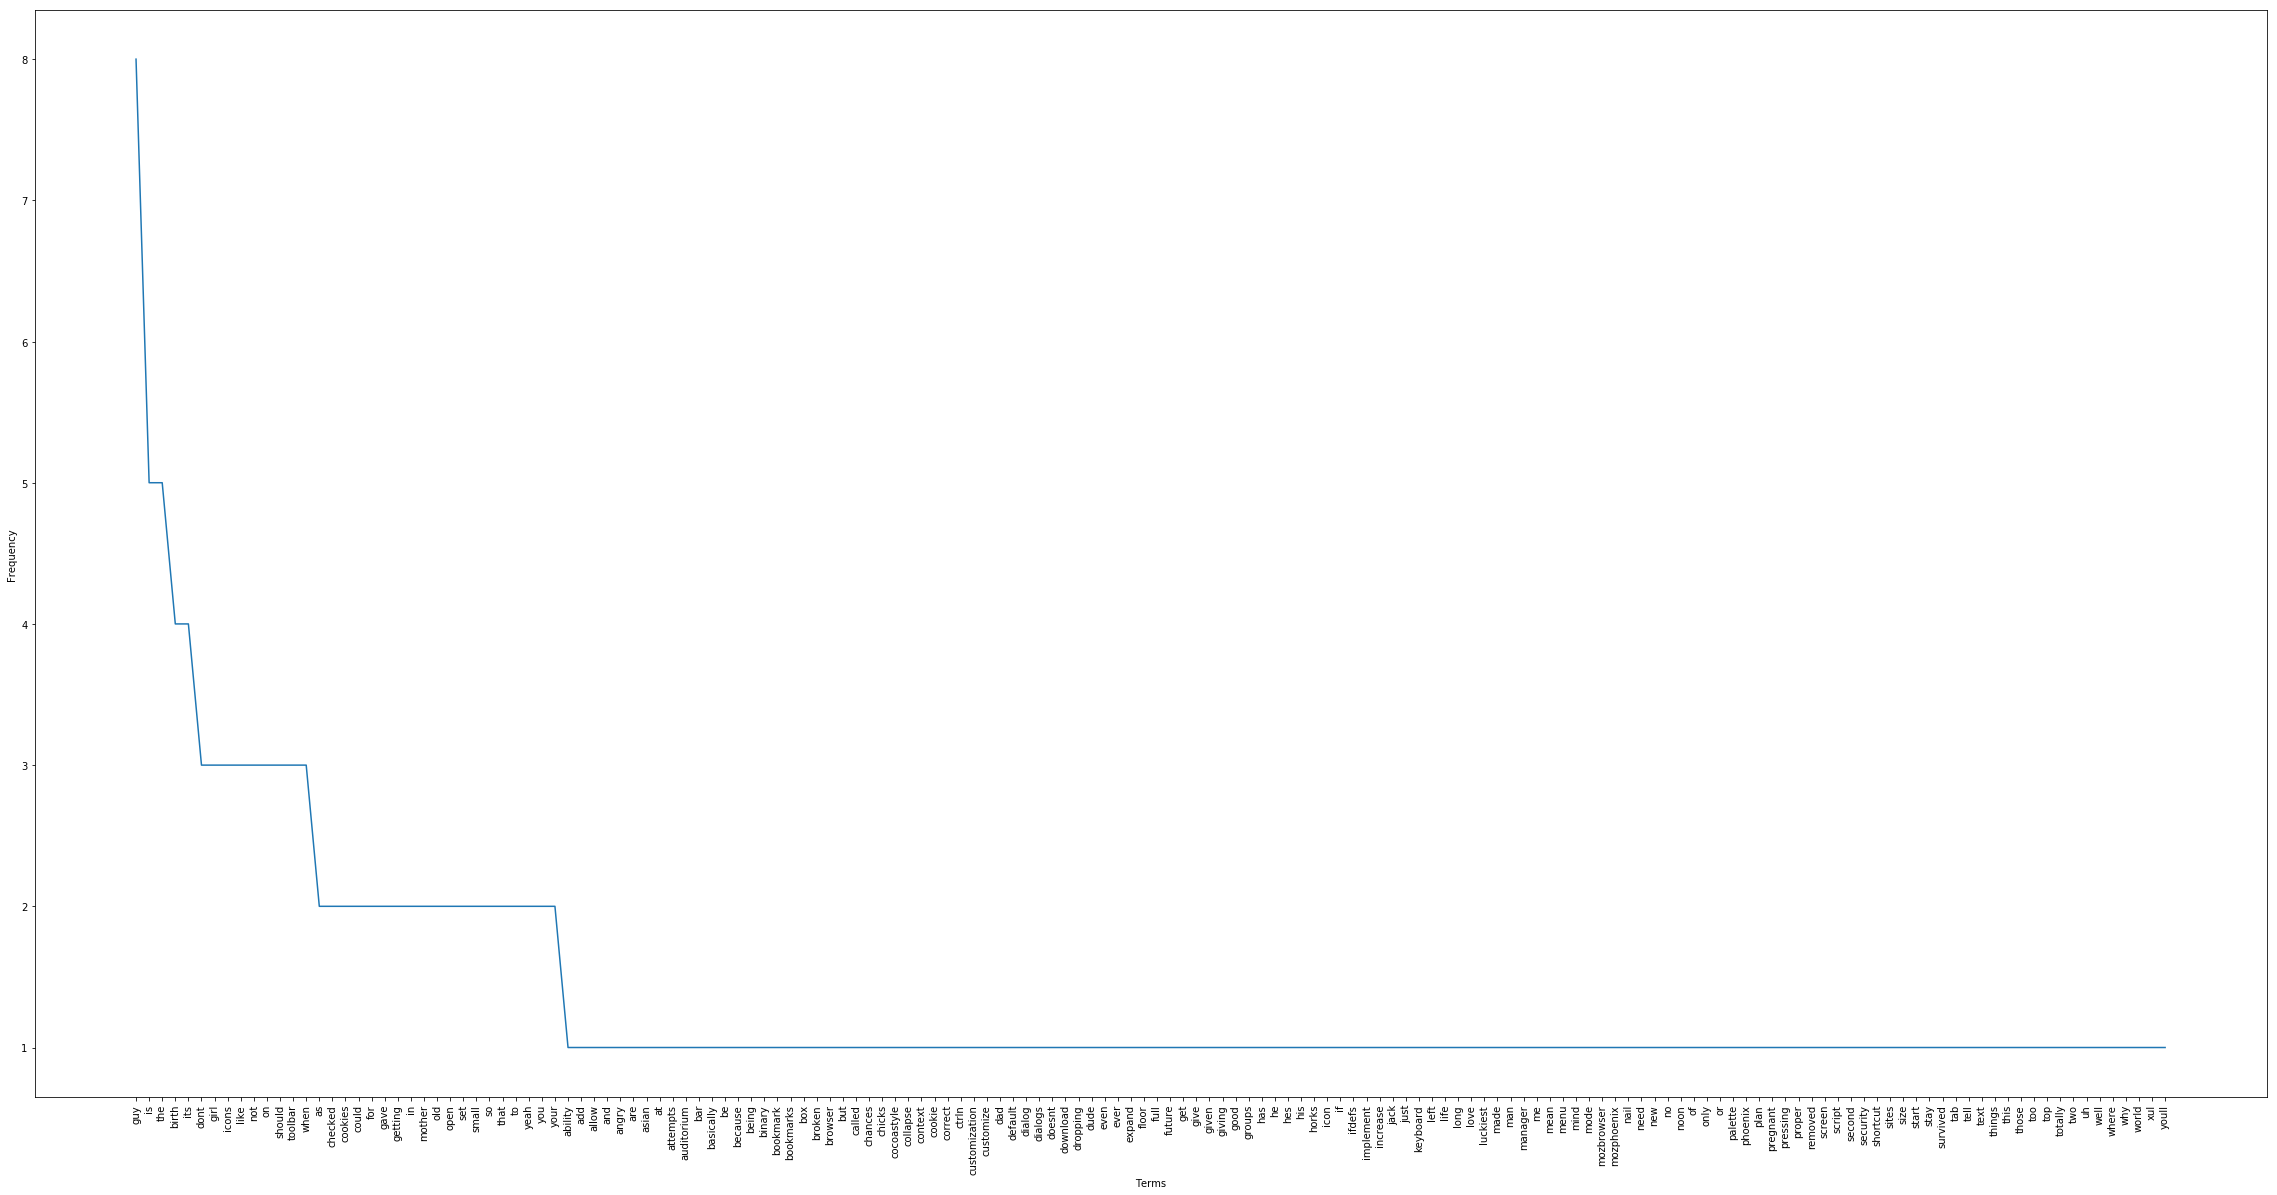

In [39]:
plot_zipf(key_occurences, value_occurences)

In [40]:
def create_dataframe_tuple(list_of_tuple, columns):
    list_of_tuple.sort(reverse=True, key=lambda x: x[1])
    df_ = pd.DataFrame(list_of_tuple, columns=columns)
    return df_

In [41]:
occurences_df = create_dataframe_tuple(occurences, columns=['terms', 'freq'])

In [42]:
idf_df = create_dataframe_tuple(list_of_tuple=idf_each_term, columns=['terms', 'idf'])

### Based on Paper....
There are several methods on removing Stopwords, in Zipf's Law (Z-Methods):
Three stopword creation methods are used in addition to the classic stoplist. This includes removing most frequent words (TF-High), removing words that occur once, i.e., singleton words (TF1), and removing words with low inverse document frequency (IDF) (Jashanjot, Buttar, 2018).

### Zipf Law

In [43]:
def filter_freq_zipf(dataframe_tf, dataframe_idf, threshold_idf):
    most_freq = max(dataframe_tf['freq'])
    #singleton_word = 1
    filter_tf = dataframe_tf[(dataframe_tf['freq'] == most_freq)] #| (dataframe_tf['freq'] == singleton_word)]
    filter_idf = dataframe_idf[(dataframe_idf['idf'] <= threshold_idf)]
    print(filter_tf)
    print(filter_idf)
    stopwords = np.concatenate((filter_tf['terms'], filter_idf['terms']))
    return list(set(stopwords))

In [44]:
stopword_zipf = filter_freq_zipf(occurences_df, idf_df, 1)

  terms  freq
0   guy     8
       terms       idf
143    birth  0.903090
144     dont  0.903090
145     girl  0.903090
146     like  0.903090
147      not  0.903090
148       on  0.903090
149   should  0.903090
150  toolbar  0.903090
151     when  0.903090
152      its  0.778151
153      the  0.778151
154       is  0.681241
155      guy  0.535113


In [45]:
stopword_zipf

['guy',
 'is',
 'on',
 'dont',
 'its',
 'birth',
 'like',
 'the',
 'should',
 'girl',
 'not',
 'when',
 'toolbar']

### Mutual Information

In [46]:
def mutual_info_feature(document):
    mi = []
    vect = CountVectorizer()
    X = vect.fit_transform(document[0]['text'])
    terms = vect.get_feature_names()
    mutual_term = mutual_info_classif(X=X, y=document[1]['domain'])
    for term, mutual in zip(terms, mutual_term):
        mi.append((term, mutual))
    return mi

In [47]:
mutual_information = mutual_info_feature([X_train, y_train])

In [48]:
mi_df = pd.DataFrame(mutual_information, columns=['terms', 'mutual information'])

In [49]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mi_df)

             terms  mutual information
0          ability            0.026311
1              add            0.026311
2            allow            0.026311
3              and            0.033580
4            angry            0.033580
5              are            0.033580
6               as            0.033580
7            asian            0.033580
8               at            0.026311
9         attempts            0.033580
10      auditorium            0.033580
11             bar            0.026311
12       basically            0.033580
13              be            0.026311
14         because            0.033580
15           being            0.033580
16          binary            0.026311
17           birth            0.108209
18        bookmark            0.026311
19       bookmarks            0.026311
20             box            0.026311
21          broken            0.026311
22         browser            0.026311
23             but            0.033580
24          called       

In [50]:
#Because minimum MI is relative value, we used rank to get the terms with miniumum MI
rank = 7

In [51]:
#filter the most minimum Mutual Information on a Sorted DF
def filter_minimum_mi(tuple_of_list, rank):
    tuple_of_list.sort(reverse=False, key=lambda x: x[1])
    df_ = pd.DataFrame(tuple_of_list, columns=['terms', 'mutual information'])
    return df_.iloc[:rank+1, :]

In [52]:
filter_minimum_mi(mutual_information, rank)

,terms,mutual information
0,in,0.000317
1,so,0.000317
2,that,0.000317
3,is,0.001816
4,dont,0.012562
5,not,0.012562
6,ability,0.026311
7,add,0.026311


### Remove Stopwords using Zipf and Mutual Information

In [53]:
def remove_stopwords(stopword_list, document):
    print('\nOriginal Doc\n', document)
    
    split_space = document['text'].apply(lambda x: x.split())
    print('\nAfter Split by Space\n', split_space)
    
    stopword_removal = split_space.apply(lambda x: [ item for item in x if item not in stopword_list ])    
    print('\nAfter Removing Stopwords\n', stopword_removal)
    
    join_space = stopword_removal.apply(lambda x: ' '.join(x))
    print('\nAfter Joining by Space\n', join_space)
    
    stopword_remove_df = pd.DataFrame(join_space)
    return stopword_remove_df

In [54]:
stopwords_df_zipf = remove_stopwords(stopword_zipf, X_train)


Original Doc
                                                  text
28     guy i dont mind getting old i love getting old
24  girl but i mean its not like i ever plan on gi...
12        dropping at top of palette box horks things
0   cookie manager dont allow sites that set remov...
4   so called tab bar should be made a proper tool...
16                        asian girl yeah being angry
5      xul implement cocoastyle toolbar customization
13  keyboard shortcut for increase text size is br...
11                          need bookmark groups icon
22               security guy its on the second floor
1                            when in full screen mode
2   pressing ctrln should open a new browser when ...
25  guy well if your mother gave birth its like yo...
3                           add icons to context menu
21      dad could you tell me where the auditorium is
26                     girl uh dude mother gave birth
18  guy so this jack guy is basically the luckiest...
29     guy ye

In [55]:
stopword_mi = filter_minimum_mi(tuple_of_list=mutual_information, rank=rank)

In [56]:
stopword_mi

,terms,mutual information
0,in,0.000317
1,so,0.000317
2,that,0.000317
3,is,0.001816
4,dont,0.012562
5,not,0.012562
6,ability,0.026311
7,add,0.026311


In [57]:
stopwords_df_mi = remove_stopwords(list(stopword_mi['terms']), X_train)


Original Doc
                                                  text
28     guy i dont mind getting old i love getting old
24  girl but i mean its not like i ever plan on gi...
12        dropping at top of palette box horks things
0   cookie manager dont allow sites that set remov...
4   so called tab bar should be made a proper tool...
16                        asian girl yeah being angry
5      xul implement cocoastyle toolbar customization
13  keyboard shortcut for increase text size is br...
11                          need bookmark groups icon
22               security guy its on the second floor
1                            when in full screen mode
2   pressing ctrln should open a new browser when ...
25  guy well if your mother gave birth its like yo...
3                           add icons to context menu
21      dad could you tell me where the auditorium is
26                     girl uh dude mother gave birth
18  guy so this jack guy is basically the luckiest...
29     guy ye

In [58]:
stopwords_df_mi

,text
28,guy i mind getting old i love getting old
24,girl but i mean its like i ever plan on giving...
12,dropping at top of palette box horks things
0,cookie manager allow sites set removed cookies...
4,called tab bar should be made a proper toolbar...
16,asian girl yeah being angry
5,xul implement cocoastyle toolbar customization
13,keyboard shortcut for increase text size broken
11,need bookmark groups icon
22,security guy its on the second floor


In [61]:
stopwords_df_nltk = remove_stopwords(nltk_stopwords, X_train)


Original Doc
                                                  text
28     guy i dont mind getting old i love getting old
24  girl but i mean its not like i ever plan on gi...
12        dropping at top of palette box horks things
0   cookie manager dont allow sites that set remov...
4   so called tab bar should be made a proper tool...
16                        asian girl yeah being angry
5      xul implement cocoastyle toolbar customization
13  keyboard shortcut for increase text size is br...
11                          need bookmark groups icon
22               security guy its on the second floor
1                            when in full screen mode
2   pressing ctrln should open a new browser when ...
25  guy well if your mother gave birth its like yo...
3                           add icons to context menu
21      dad could you tell me where the auditorium is
26                     girl uh dude mother gave birth
18  guy so this jack guy is basically the luckiest...
29     guy ye

In [62]:
def generate_term(document):
    cv = CountVectorizer()
    X_st = cv.fit_transform(document['text'])
    return cv.get_feature_names()

In [63]:
generate_term(stopwords_df_zipf)

['ability',
 'add',
 'allow',
 'and',
 'angry',
 'are',
 'as',
 'asian',
 'at',
 'attempts',
 'auditorium',
 'bar',
 'basically',
 'be',
 'because',
 'being',
 'binary',
 'bookmark',
 'bookmarks',
 'box',
 'broken',
 'browser',
 'but',
 'called',
 'chances',
 'checked',
 'chicks',
 'cocoastyle',
 'collapse',
 'context',
 'cookie',
 'cookies',
 'correct',
 'could',
 'ctrln',
 'customization',
 'customize',
 'dad',
 'default',
 'dialog',
 'dialogs',
 'doesnt',
 'download',
 'dropping',
 'dude',
 'even',
 'ever',
 'expand',
 'floor',
 'for',
 'full',
 'future',
 'gave',
 'get',
 'getting',
 'give',
 'given',
 'giving',
 'good',
 'groups',
 'has',
 'he',
 'hes',
 'his',
 'horks',
 'icon',
 'icons',
 'if',
 'ifdefs',
 'implement',
 'in',
 'increase',
 'jack',
 'just',
 'keyboard',
 'left',
 'life',
 'long',
 'love',
 'luckiest',
 'made',
 'man',
 'manager',
 'me',
 'mean',
 'menu',
 'mind',
 'mode',
 'mother',
 'mozbrowser',
 'mozphoenix',
 'nail',
 'need',
 'new',
 'no',
 'noon',
 'of',
 '

In [64]:
generate_term(stopwords_df_mi)

['allow',
 'and',
 'angry',
 'are',
 'as',
 'asian',
 'at',
 'attempts',
 'auditorium',
 'bar',
 'basically',
 'be',
 'because',
 'being',
 'binary',
 'birth',
 'bookmark',
 'bookmarks',
 'box',
 'broken',
 'browser',
 'but',
 'called',
 'chances',
 'checked',
 'chicks',
 'cocoastyle',
 'collapse',
 'context',
 'cookie',
 'cookies',
 'correct',
 'could',
 'ctrln',
 'customization',
 'customize',
 'dad',
 'default',
 'dialog',
 'dialogs',
 'doesnt',
 'download',
 'dropping',
 'dude',
 'even',
 'ever',
 'expand',
 'floor',
 'for',
 'full',
 'future',
 'gave',
 'get',
 'getting',
 'girl',
 'give',
 'given',
 'giving',
 'good',
 'groups',
 'guy',
 'has',
 'he',
 'hes',
 'his',
 'horks',
 'icon',
 'icons',
 'if',
 'ifdefs',
 'implement',
 'increase',
 'its',
 'jack',
 'just',
 'keyboard',
 'left',
 'life',
 'like',
 'long',
 'love',
 'luckiest',
 'made',
 'man',
 'manager',
 'me',
 'mean',
 'menu',
 'mind',
 'mode',
 'mother',
 'mozbrowser',
 'mozphoenix',
 'nail',
 'need',
 'new',
 'no',
 

## Ranking Evaluation

In this section, we compute the Cosine Similarity between Query and Corpus

### We have to preprocess the Validation Data first

In [65]:
cleansing(document=X_valid)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,text
0,guy absolutely
1,white guy so do you have any plans for this ev...
2,dad wait you mean its actually in the building
3,white guy oh that sounds good
4,nightly builds and tinderboxen for phoenix
5,finish tearing prefs ui to pieces and then mak...


### Dataframe Results after Removing Stopwords using Mutual Information and Zipf Law

In [66]:
nltk_stopwords = stopwords.words('english')

In [67]:
nltk_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Query

### NLTK Stopwords

In [68]:
valid_remove_nltk = remove_stopwords(nltk_stopwords, X_valid)


Original Doc
                                                  text
27                                     guy absolutely
15  white guy so do you have any plans for this ev...
23     dad wait you mean its actually in the building
17                      white guy oh that sounds good
8          nightly builds and tinderboxen for phoenix
9   finish tearing prefs ui to pieces and then mak...

After Split by Space
 27                                    [guy, absolutely]
15    [white, guy, so, do, you, have, any, plans, fo...
23    [dad, wait, you, mean, its, actually, in, the,...
17                 [white, guy, oh, that, sounds, good]
8     [nightly, builds, and, tinderboxen, for, phoenix]
9     [finish, tearing, prefs, ui, to, pieces, and, ...
Name: text, dtype: object

After Removing Stopwords
 27                                   [guy, absolutely]
15                        [white, guy, plans, evening]
23               [dad, wait, mean, actually, building]
17                      [white

In [69]:
valid_stopwords_df_nltk = pd.concat([valid_remove_nltk, y_valid], axis=1)

In [70]:
valid_stopwords_df_nltk

,text,domain
27,guy absolutely,overheard
15,white guy plans evening,overheard
23,dad wait mean actually building,overheard
17,white guy oh sounds good,overheard
8,nightly builds tinderboxen phoenix,firefox
9,finish tearing prefs ui pieces make suck,firefox


### Mutual Information

In [71]:
list(stopword_mi['terms'])

['in', 'so', 'that', 'is', 'dont', 'not', 'ability', 'add']

In [72]:
valid_remove_mi = remove_stopwords(list(stopword_mi['terms']), X_valid)


Original Doc
                                                  text
27                                     guy absolutely
15  white guy so do you have any plans for this ev...
23     dad wait you mean its actually in the building
17                      white guy oh that sounds good
8          nightly builds and tinderboxen for phoenix
9   finish tearing prefs ui to pieces and then mak...

After Split by Space
 27                                    [guy, absolutely]
15    [white, guy, so, do, you, have, any, plans, fo...
23    [dad, wait, you, mean, its, actually, in, the,...
17                 [white, guy, oh, that, sounds, good]
8     [nightly, builds, and, tinderboxen, for, phoenix]
9     [finish, tearing, prefs, ui, to, pieces, and, ...
Name: text, dtype: object

After Removing Stopwords
 27                                    [guy, absolutely]
15    [white, guy, do, you, have, any, plans, for, t...
23    [dad, wait, you, mean, its, actually, the, bui...
17                       [w

In [73]:
valid_stopwords_df_mi = pd.concat([valid_remove_mi, y_valid], axis=1)

In [74]:
valid_stopwords_df_mi

,text,domain
27,guy absolutely,overheard
15,white guy do you have any plans for this evening,overheard
23,dad wait you mean its actually the building,overheard
17,white guy oh sounds good,overheard
8,nightly builds and tinderboxen for phoenix,firefox
9,finish tearing prefs ui to pieces and then mak...,firefox


### Zipf Law

In [75]:
stopword_zipf

['guy',
 'is',
 'on',
 'dont',
 'its',
 'birth',
 'like',
 'the',
 'should',
 'girl',
 'not',
 'when',
 'toolbar']

In [76]:
valid_remove_zipf = remove_stopwords(stopword_zipf, X_valid)


Original Doc
                                                  text
27                                     guy absolutely
15  white guy so do you have any plans for this ev...
23     dad wait you mean its actually in the building
17                      white guy oh that sounds good
8          nightly builds and tinderboxen for phoenix
9   finish tearing prefs ui to pieces and then mak...

After Split by Space
 27                                    [guy, absolutely]
15    [white, guy, so, do, you, have, any, plans, fo...
23    [dad, wait, you, mean, its, actually, in, the,...
17                 [white, guy, oh, that, sounds, good]
8     [nightly, builds, and, tinderboxen, for, phoenix]
9     [finish, tearing, prefs, ui, to, pieces, and, ...
Name: text, dtype: object

After Removing Stopwords
 27                                         [absolutely]
15    [white, so, do, you, have, any, plans, for, th...
23       [dad, wait, you, mean, actually, in, building]
17                      [wh

In [77]:
valid_stopwords_df_zipf = pd.concat([valid_remove_zipf, y_valid], axis=1)

In [78]:
valid_stopwords_df_zipf

,text,domain
27,absolutely,overheard
15,white so do you have any plans for this evening,overheard
23,dad wait you mean actually in building,overheard
17,white oh that sounds good,overheard
8,nightly builds and tinderboxen for phoenix,firefox
9,finish tearing prefs ui to pieces and then mak...,firefox


### Corpus

### NLTK Stopwords

In [79]:
stopwords_df_nltk = pd.concat([stopwords_df_nltk, y_train], axis=1)

In [80]:
stopwords_df_nltk

,text,domain
28,guy dont mind getting old love getting old,overheard
24,girl mean like ever plan giving birth,overheard
12,dropping top palette box horks things,firefox
0,cookie manager dont allow sites set removed co...,firefox
4,called tab bar made proper toolbar given abili...,firefox
16,asian girl yeah angry,overheard
5,xul implement cocoastyle toolbar customization,firefox
13,keyboard shortcut increase text size broken,firefox
11,need bookmark groups icon,firefox
22,security guy second floor,overheard


### Mutual Information

In [81]:
stopwords_df_mi = pd.concat([stopwords_df_mi, y_train], axis=1)

In [82]:
stopwords_df_mi

,text,domain
28,guy i mind getting old i love getting old,overheard
24,girl but i mean its like i ever plan on giving...,overheard
12,dropping at top of palette box horks things,firefox
0,cookie manager allow sites set removed cookies...,firefox
4,called tab bar should be made a proper toolbar...,firefox
16,asian girl yeah being angry,overheard
5,xul implement cocoastyle toolbar customization,firefox
13,keyboard shortcut for increase text size broken,firefox
11,need bookmark groups icon,firefox
22,security guy its on the second floor,overheard


### Zipf Law

In [83]:
stopwords_df_zipf = pd.concat([stopwords_df_zipf, y_train], axis=1)

In [84]:
stopwords_df_zipf

,text,domain
28,i mind getting old i love getting old,overheard
24,but i mean i ever plan giving,overheard
12,dropping at top of palette box horks things,firefox
0,cookie manager allow sites that set removed co...,firefox
4,so called tab bar be made a proper or given ab...,firefox
16,asian yeah being angry,overheard
5,xul implement cocoastyle customization,firefox
13,keyboard shortcut for increase text size broken,firefox
11,need bookmark groups icon,firefox
22,security second floor,overheard


### Concat the Corpus and Query into 1 Dataframe first to Compute the Cosine Similarity

I am using this reference while computing Cosine Similarity:
* http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

In [85]:
def compute_cossim(document_corpus, document_query):
    cossim_list = []
    for i in range(len(document_query)):
        
        #Add the query to the Corpus (will be the last index)
        appended_document = document_corpus.append(document_query.iloc[i])
        print('\nAfter Append Query to Corpus\n', appended_document)
        
        cv_cossim = CountVectorizer()
        tf_matrix = cv_cossim.fit_transform(appended_document['text'])
        
        #-1 index means we want to compute cossim between the Query (the last data because appended) and Corpus
        cossim = cosine_similarity(tf_matrix[-1], tf_matrix)
        
        print('Cosine Similarity-', (i+1) ,'th\n', cossim, '\n')
        print(appended_document.reset_index(drop=True))
        
        #Concat the Appended Document with Cossim Value (Ravel is for flatten the 2d into 1d array)
        cossim_df = pd.DataFrame(cossim.ravel(), columns=['cossim'])
        concat_cossim = pd.concat([appended_document.reset_index(drop=True), cossim_df], axis=1)
        cossim_list.append(concat_cossim)
        print('\nAfter concat with Cossim\n', concat_cossim)
        print('='*100)
        
    return cossim_list

In [86]:
def define_relevant(list_of_cosine_similarity):
    cossim_relevant_not = []
    for cossim in list_of_cosine_similarity:
        query_label = cossim.iloc[-1]['domain']
        corpus_label = cossim.iloc[:-1]['domain']
        relevant_or_not = [ 'Relevant' if item == query_label else 'Not Relevant' for item in corpus_label ]
        ron_df = pd.DataFrame(relevant_or_not, columns=['Relevant/Not Relevant'])
        print('\nRelevant/Not Dataframe\n', ron_df)
        concat_ = pd.concat([cossim, ron_df], axis=1)
        
        #sort Cossim Descending from highest value to lowest value
        concat_ = concat_.sort_values(by='cossim', ascending=False)
        print('\nConcat with Relevant / Not \n', concat_)
        cossim_relevant_not.append(concat_)
        
    return cossim_relevant_not

### Mutual Information

In [87]:
cossim_using_mi = compute_cossim(document_corpus=stopwords_df_mi, document_query=valid_stopwords_df_mi)


After Append Query to Corpus
                                                  text     domain
28          guy i mind getting old i love getting old  overheard
24  girl but i mean its like i ever plan on giving...  overheard
12        dropping at top of palette box horks things    firefox
0   cookie manager allow sites set removed cookies...    firefox
4   called tab bar should be made a proper toolbar...    firefox
16                        asian girl yeah being angry  overheard
5      xul implement cocoastyle toolbar customization    firefox
13    keyboard shortcut for increase text size broken    firefox
11                          need bookmark groups icon    firefox
22               security guy its on the second floor  overheard
1                               when full screen mode    firefox
2   pressing ctrln should open a new browser when ...    firefox
25  guy well if your mother gave birth its like yo...  overheard
3                               icons to context menu    fi

In [88]:
cossim_using_mi

[                                                 text     domain    cossim
 0           guy i mind getting old i love getting old  overheard  0.213201
 1   girl but i mean its like i ever plan on giving...  overheard  0.000000
 2         dropping at top of palette box horks things    firefox  0.000000
 3   cookie manager allow sites set removed cookies...    firefox  0.000000
 4   called tab bar should be made a proper toolbar...    firefox  0.000000
 5                         asian girl yeah being angry  overheard  0.000000
 6      xul implement cocoastyle toolbar customization    firefox  0.000000
 7     keyboard shortcut for increase text size broken    firefox  0.000000
 8                           need bookmark groups icon    firefox  0.000000
 9                security guy its on the second floor  overheard  0.267261
 10                              when full screen mode    firefox  0.000000
 11  pressing ctrln should open a new browser when ...    firefox  0.000000
 12  guy wel

In [89]:
relevant_not_mi_ = define_relevant(cossim_using_mi)


Relevant/Not Dataframe
    Relevant/Not Relevant
0               Relevant
1               Relevant
2           Not Relevant
3           Not Relevant
4           Not Relevant
5               Relevant
6           Not Relevant
7           Not Relevant
8           Not Relevant
9               Relevant
10          Not Relevant
11          Not Relevant
12              Relevant
13          Not Relevant
14              Relevant
15              Relevant
16              Relevant
17              Relevant
18              Relevant
19          Not Relevant
20          Not Relevant
21          Not Relevant
22              Relevant
23          Not Relevant

Concat with Relevant / Not 
                                                  text     domain    cossim  \
24                                     guy absolutely  overheard  1.000000   
16  guy this jack guy basically the luckiest man t...  overheard  0.377964   
9                security guy its on the second floor  overheard  0.267261   
18      

### NLTK

In [90]:
cossim_using_nltk = compute_cossim(document_corpus=stopwords_df_nltk, document_query=valid_stopwords_df_nltk)


After Append Query to Corpus
                                                  text     domain
28         guy dont mind getting old love getting old  overheard
24              girl mean like ever plan giving birth  overheard
12              dropping top palette box horks things    firefox
0   cookie manager dont allow sites set removed co...    firefox
4   called tab bar made proper toolbar given abili...    firefox
16                              asian girl yeah angry  overheard
5      xul implement cocoastyle toolbar customization    firefox
13        keyboard shortcut increase text size broken    firefox
11                          need bookmark groups icon    firefox
22                          security guy second floor  overheard
1                                    full screen mode    firefox
2   pressing ctrln open new browser download dialo...    firefox
25  guy well mother gave birth like chances good y...  overheard
3                              add icons context menu    fi

In [91]:
relevant_not_nltk_ = define_relevant(cossim_using_nltk)


Relevant/Not Dataframe
    Relevant/Not Relevant
0               Relevant
1               Relevant
2           Not Relevant
3           Not Relevant
4           Not Relevant
5               Relevant
6           Not Relevant
7           Not Relevant
8           Not Relevant
9               Relevant
10          Not Relevant
11          Not Relevant
12              Relevant
13          Not Relevant
14              Relevant
15              Relevant
16              Relevant
17              Relevant
18              Relevant
19          Not Relevant
20          Not Relevant
21          Not Relevant
22              Relevant
23          Not Relevant

Concat with Relevant / Not 
                                                  text     domain    cossim  \
24                                     guy absolutely  overheard  1.000000   
16          guy jack guy basically luckiest man world  overheard  0.471405   
9                           security guy second floor  overheard  0.353553   
18      

### Zipf Law

In [92]:
cossim_using_zipf = compute_cossim(document_corpus=stopwords_df_zipf, document_query=valid_stopwords_df_zipf)


After Append Query to Corpus
                                                  text     domain
28              i mind getting old i love getting old  overheard
24                      but i mean i ever plan giving  overheard
12        dropping at top of palette box horks things    firefox
0   cookie manager allow sites that set removed co...    firefox
4   so called tab bar be made a proper or given ab...    firefox
16                             asian yeah being angry  overheard
5              xul implement cocoastyle customization    firefox
13    keyboard shortcut for increase text size broken    firefox
11                          need bookmark groups icon    firefox
22                              security second floor  overheard
1                                 in full screen mode    firefox
2   pressing ctrln open a new browser only downloa...    firefox
25  well if your mother gave your chances are good...  overheard
3                           add icons to context menu    fi

In [93]:
relevant_not_zipf_ = define_relevant(cossim_using_zipf)


Relevant/Not Dataframe
    Relevant/Not Relevant
0               Relevant
1               Relevant
2           Not Relevant
3           Not Relevant
4           Not Relevant
5               Relevant
6           Not Relevant
7           Not Relevant
8           Not Relevant
9               Relevant
10          Not Relevant
11          Not Relevant
12              Relevant
13          Not Relevant
14              Relevant
15              Relevant
16              Relevant
17              Relevant
18              Relevant
19          Not Relevant
20          Not Relevant
21          Not Relevant
22              Relevant
23          Not Relevant

Concat with Relevant / Not 
                                                  text     domain  cossim  \
24                                         absolutely  overheard     1.0   
13                          add icons to context menu    firefox     0.0   
23                              ifdefs for mozphoenix    firefox     0.0   
22  why because 

### In this code we used 6 queries, which every query included with the Corpus.
Below are the examples of Query using MI on Stopword removal

In [94]:
relevant_not_mi_[0]

,text,domain,cossim,Relevant/Not Relevant
24,guy absolutely,overheard,1.000000,NaN
16,guy this jack guy basically the luckiest man t...,overheard,0.377964,Relevant
9,security guy its on the second floor,overheard,0.267261,Relevant
18,guy no he could totally nail those two chicks,overheard,0.235702,Relevant
17,guy yeah just as long as you get pregnant,overheard,0.213201,Relevant
0,guy i mind getting old i love getting old,overheard,0.213201,Relevant
22,guy why because hes survived like attempts on ...,overheard,0.188982,Relevant
12,guy well if your mother gave birth its like yo...,overheard,0.154303,Relevant
4,called tab bar should be made a proper toolbar...,firefox,0.000000,Not Relevant
23,ifdefs for mozphoenix,firefox,0.000000,Not Relevant


In [95]:
relevant_not_mi_[1]

,text,domain,cossim,Relevant/Not Relevant
24,white guy do you have any plans for this evening,overheard,1.000000,NaN
16,guy this jack guy basically the luckiest man t...,overheard,0.253546,Relevant
17,guy yeah just as long as you get pregnant,overheard,0.190693,Relevant
23,ifdefs for mozphoenix,firefox,0.182574,Not Relevant
9,security guy its on the second floor,overheard,0.119523,Relevant
7,keyboard shortcut for increase text size broken,firefox,0.119523,Not Relevant
14,dad could you tell me where the auditorium,overheard,0.111803,Relevant
18,guy no he could totally nail those two chicks,overheard,0.105409,Relevant
0,guy i mind getting old i love getting old,overheard,0.095346,Relevant
22,guy why because hes survived like attempts on ...,overheard,0.084515,Relevant


In [96]:
relevant_not_mi_[2]

,text,domain,cossim,Relevant/Not Relevant
24,dad wait you mean its actually the building,overheard,1.000000,NaN
14,dad could you tell me where the auditorium,overheard,0.375000,Relevant
9,security guy its on the second floor,overheard,0.267261,Relevant
1,girl but i mean its like i ever plan on giving...,overheard,0.223607,Relevant
16,guy this jack guy basically the luckiest man t...,overheard,0.188982,Relevant
17,guy yeah just as long as you get pregnant,overheard,0.106600,Relevant
4,called tab bar should be made a proper toolbar...,firefox,0.098058,Not Relevant
22,guy why because hes survived like attempts on ...,overheard,0.094491,Relevant
12,guy well if your mother gave birth its like yo...,overheard,0.077152,Relevant
8,need bookmark groups icon,firefox,0.000000,Not Relevant


In [97]:
relevant_not_mi_[3]

,text,domain,cossim,Relevant/Not Relevant
24,white guy oh sounds good,overheard,1.000000,NaN
16,guy this jack guy basically the luckiest man t...,overheard,0.239046,Relevant
12,guy well if your mother gave birth its like yo...,overheard,0.195180,Relevant
9,security guy its on the second floor,overheard,0.169031,Relevant
18,guy no he could totally nail those two chicks,overheard,0.149071,Relevant
0,guy i mind getting old i love getting old,overheard,0.134840,Relevant
17,guy yeah just as long as you get pregnant,overheard,0.134840,Relevant
22,guy why because hes survived like attempts on ...,overheard,0.119523,Relevant
15,girl uh dude mother gave birth,overheard,0.000000,Relevant
23,ifdefs for mozphoenix,firefox,0.000000,Not Relevant


In [98]:
relevant_not_mi_[4]

,text,domain,cossim,Relevant/Not Relevant
24,nightly builds and tinderboxen for phoenix,firefox,1.000000,NaN
23,ifdefs for mozphoenix,firefox,0.235702,Relevant
21,default phoenix bookmarks,firefox,0.235702,Relevant
7,keyboard shortcut for increase text size broken,firefox,0.154303,Relevant
22,guy why because hes survived like attempts on ...,overheard,0.109109,Not Relevant
13,icons to context menu,firefox,0.000000,Relevant
20,mozbrowser script doesnt start correct binary,firefox,0.000000,Relevant
19,customize dialogs toolbar has small icons when...,firefox,0.000000,Relevant
18,guy no he could totally nail those two chicks,overheard,0.000000,Not Relevant
17,guy yeah just as long as you get pregnant,overheard,0.000000,Not Relevant


In [99]:
relevant_not_mi_[5]

,text,domain,cossim,Relevant/Not Relevant
24,finish tearing prefs ui to pieces and then mak...,firefox,1.000000,NaN
13,icons to context menu,firefox,0.150756,Relevant
22,guy why because hes survived like attempts on ...,overheard,0.080582,Not Relevant
3,cookie manager allow sites set removed cookies...,firefox,0.071067,Relevant
23,ifdefs for mozphoenix,firefox,0.000000,Relevant
21,default phoenix bookmarks,firefox,0.000000,Relevant
20,mozbrowser script doesnt start correct binary,firefox,0.000000,Relevant
19,customize dialogs toolbar has small icons when...,firefox,0.000000,Relevant
18,guy no he could totally nail those two chicks,overheard,0.000000,Not Relevant
17,guy yeah just as long as you get pregnant,overheard,0.000000,Not Relevant


### Using Precision@K

In [100]:
def precision_at_k(document, k: int):
    precision_list = []
    for idx, each_doc in enumerate(document):
        print('Query ', idx+1, ': ', each_doc.iloc[0]['text'], '\n')
        #we add it with 1 when every document is relevant, and start the loop from 1 till k to avoid the Query which located at first index.
        result = [ each_doc.iloc[i]['text'] for i in range(1, k+1) if each_doc.iloc[i]['Relevant/Not Relevant'] == 'Relevant' ]

        #we print the Relevant Documents at K
        print('Relevant Documents\n')
        for i, item in enumerate(result):
            print(i+1, ')', item)
        print('\nPrecision@', k, '= ', len(result), '/', k, '= ', len(result)/k)
        print('='*100, '\n')
        precision_list.append(len(result)/k)
    plot_precision_at_k(precision_list=precision_list)
    return

In [101]:
def plot_precision_at_k(precision_list):
    query_text = []
    fig = plt.figure(figsize=(10,10))
    for i in range(len(precision_list)):
        query_text.append('Query '+str(i+1))
    y_pos = np.arange(len(precision_list))
    plt.bar(y_pos, precision_list, align='center')
    plt.xticks(y_pos , query_text)
    plt.show()

### Precision@K using NLTK for Removing Stopwords

Query  1 :  guy absolutely 

Relevant Documents

1 ) guy jack guy basically luckiest man world
2 ) security guy second floor
3 ) guy could totally nail two chicks
4 ) guy yeah long dont get pregnant
5 ) guy hes survived like attempts life even noon

Precision@ 5 =  5 / 5 =  1.0

Query  2 :  white guy plans evening 

Relevant Documents

1 ) guy jack guy basically luckiest man world
2 ) security guy second floor
3 ) guy could totally nail two chicks
4 ) guy yeah long dont get pregnant
5 ) guy hes survived like attempts life even noon

Precision@ 5 =  5 / 5 =  1.0

Query  3 :  dad wait mean actually building 

Relevant Documents

1 ) dad could tell auditorium
2 ) girl mean like ever plan giving birth
3 ) guy hes survived like attempts life even noon

Precision@ 5 =  3 / 5 =  0.6

Query  4 :  white guy oh sounds good 

Relevant Documents

1 ) guy jack guy basically luckiest man world
2 ) guy well mother gave birth like chances good youll give birth
3 ) security guy second floor
4 ) guy cou

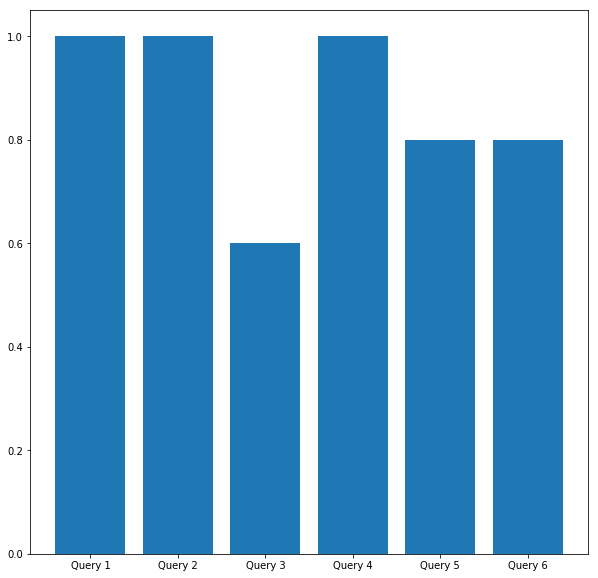

In [102]:
precision_at_k(relevant_not_nltk_, k=5)

### Precision@K using Mutual Information for Removing Stopwords

Query  1 :  guy absolutely 

Relevant Documents

1 ) guy this jack guy basically the luckiest man the world
2 ) security guy its on the second floor
3 ) guy no he could totally nail those two chicks
4 ) guy yeah just as long as you get pregnant
5 ) guy i mind getting old i love getting old

Precision@ 5 =  5 / 5 =  1.0

Query  2 :  white guy do you have any plans for this evening 

Relevant Documents

1 ) guy this jack guy basically the luckiest man the world
2 ) guy yeah just as long as you get pregnant
3 ) security guy its on the second floor

Precision@ 5 =  3 / 5 =  0.6

Query  3 :  dad wait you mean its actually the building 

Relevant Documents

1 ) dad could you tell me where the auditorium
2 ) security guy its on the second floor
3 ) girl but i mean its like i ever plan on giving birth
4 ) guy this jack guy basically the luckiest man the world
5 ) guy yeah just as long as you get pregnant

Precision@ 5 =  5 / 5 =  1.0

Query  4 :  white guy oh sounds good 

Relevant Documents



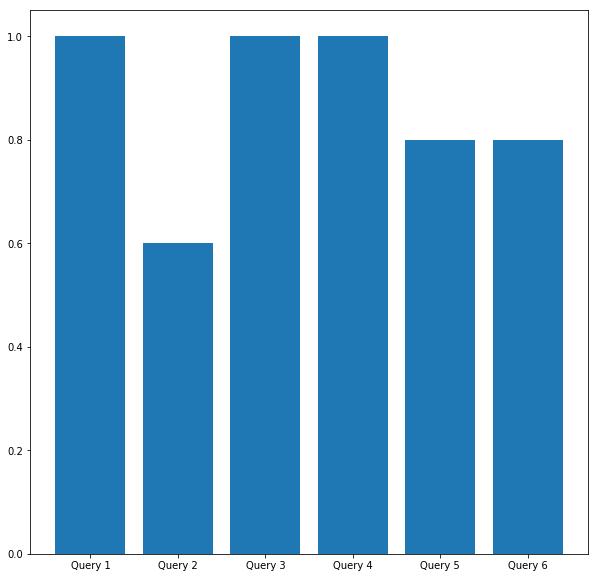

In [103]:
precision_at_k(relevant_not_mi_, k=5)

### Precision@K using Zipf Law for Removing Stopwords

Query  1 :  absolutely 

Relevant Documents

1 ) why because hes survived attempts his life and even noon

Precision@ 5 =  1 / 5 =  0.2

Query  2 :  white so do you have any plans for this evening 

Relevant Documents

1 ) so this jack basically luckiest man in world
2 ) dad could you tell me where auditorium
3 ) yeah just as long as you get pregnant

Precision@ 5 =  3 / 5 =  0.6

Query  3 :  dad wait you mean actually in building 

Relevant Documents

1 ) dad could you tell me where auditorium
2 ) but i mean i ever plan giving
3 ) so this jack basically luckiest man in world
4 ) yeah just as long as you get pregnant

Precision@ 5 =  4 / 5 =  0.8

Query  4 :  white oh that sounds good 

Relevant Documents

1 ) well if your mother gave your chances are good that youll give too
2 ) dad could you tell me where auditorium

Precision@ 5 =  2 / 5 =  0.4

Query  5 :  nightly builds and tinderboxen for phoenix 

Relevant Documents

1 ) ifdefs for mozphoenix
2 ) default phoenix bookmarks
3 ) ke

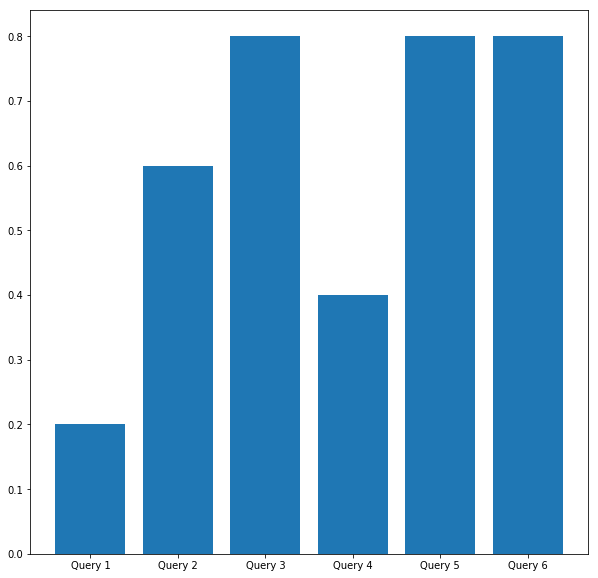

In [104]:
precision_at_k(relevant_not_zipf_, k=5)

### Mean Average Precision

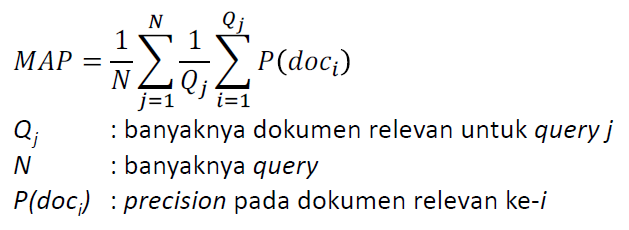

In [105]:
def mean_average_precision(document):
    map_list = []
    precision_list = []
    #loop i index for dataframe
    for i in range(len(document)):
        #we reset the Relevant Doc count to be zero every Loop on Dataframe
        countRelevant = 0
        
        #loop j index for every row in dataframe
        for j in range(len(document[i])):
            #Checks if every document is relevant with the Query or Not
            if document[i].iloc[j]['Relevant/Not Relevant'] == 'Relevant':
                countRelevant+=1
                precision = countRelevant/j
            else:
                precision = 0
                
            #Precision value on every document (on each Dataframe) will be append to this List
            precision_list.append(precision)
            
        precision_df = pd.DataFrame(precision_list, columns=['precision'])
        concat_with_precision = pd.concat([document[i].reset_index(drop=True), precision_df], axis=1)
        precision_list.append(concat_with_precision)
        
        map_each_query = np.mean(concat_with_precision['precision'])
        print('Query', (i+1), ': ', document[i].iloc[0]['text'])
        print('Average Precision from Query', i, '= ', map_each_query, '\n')
        map_list.append(map_each_query)
        
        #Clear the Precision List before going to next Loop on Dataframe that consists of Query and Corpus
        precision_list.clear()
    
    mean_average_precision_all_query = np.mean(map_list)
    return mean_average_precision_all_query

### MAP using NLTK for Removing Stopwords

In [106]:
map_nltk = mean_average_precision(document=relevant_not_nltk_)
map_nltk

Query 1 :  guy absolutely
Average Precision from Query 0 =  0.35715686274509806 

Query 2 :  white guy plans evening
Average Precision from Query 1 =  0.35715686274509806 

Query 3 :  dad wait mean actually building
Average Precision from Query 2 =  0.27237801087801083 

Query 4 :  white guy oh sounds good
Average Precision from Query 3 =  0.3769011082693947 

Query 5 :  nightly builds tinderboxen phoenix
Average Precision from Query 4 =  0.3463982765563059 

Query 6 :  finish tearing prefs ui pieces make suck
Average Precision from Query 5 =  0.3363982765563059 



0.3410648996250356

### MAP using Mutual Information for Removing Stopwords

In [107]:
map_mi = mean_average_precision(document=relevant_not_mi_)
map_mi

Query 1 :  guy absolutely
Average Precision from Query 0 =  0.35428604934796887 

Query 2 :  white guy do you have any plans for this evening
Average Precision from Query 1 =  0.33203734827264236 

Query 3 :  dad wait you mean its actually the building
Average Precision from Query 2 =  0.3536746031746032 

Query 4 :  white guy oh sounds good
Average Precision from Query 3 =  0.3769011082693947 

Query 5 :  nightly builds and tinderboxen for phoenix
Average Precision from Query 4 =  0.3647176042873983 

Query 6 :  finish tearing prefs ui to pieces and then make it suck
Average Precision from Query 5 =  0.342431890001684 



0.35400810055894855

### MAP using Zipf Law for Removing Stopwords

In [108]:
map_zipf = mean_average_precision(document=relevant_not_zipf_)
map_zipf

Query 1 :  absolutely
Average Precision from Query 0 =  0.20813991563991563 

Query 2 :  white so do you have any plans for this evening
Average Precision from Query 1 =  0.2519583749583749 

Query 3 :  dad wait you mean actually in building
Average Precision from Query 2 =  0.28783832833832834 

Query 4 :  white oh that sounds good
Average Precision from Query 3 =  0.23356876456876452 

Query 5 :  nightly builds and tinderboxen for phoenix
Average Precision from Query 4 =  0.3647176042873983 

Query 6 :  finish tearing prefs ui to pieces and then make it suck
Average Precision from Query 5 =  0.342431890001684 



0.281442479632411

### Plot them

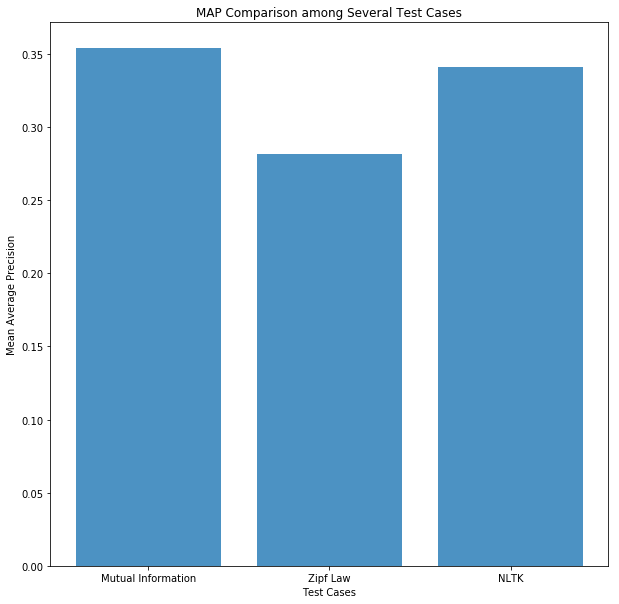

In [109]:
map_all_tc = np.array([map_mi, map_zipf, map_nltk])
test_cases = ['Mutual Information', 'Zipf Law', 'NLTK']
y_pos = np.arange(len(map_all_tc))

fig = plt.figure(figsize=(10,10))
plt.title('MAP Comparison among Several Test Cases')
plt.xlabel('Test Cases')
plt.ylabel('Mean Average Precision')
plt.bar(y_pos, map_all_tc, align='center', alpha=0.8)
plt.xticks(y_pos, test_cases)
plt.show()